# K-Means Clustering 

<b>Problem Description:</b><br>
In NBA media coverage, sports reporters usually focus on a handful of players who get a disproportionate share of the attention and paint stories of how unique these players' stats are. With our data science hats on, we can't help but feel a slight sense of skepticism to how different the players are from one another. Let's see how we can use data science to explore that thread further.
Let's look at the dataset of player performance from the 2013-2014 season.

I have considered 2013 NBA data, Here are some selected columns:<br>
- player -- name of the player
- pos -- the position of the player
- g -- number of games the player was in
- pts -- total points the player scored
- fg. -- field goal percentage
- ft. -- free throw percentage

In [1]:
#importing the Basic Libraries
import numpy as np
import pandas as pd
import os

In [2]:
#importing the data
nba_data = pd.read_csv("../input/nba_data.csv")
nba_data.head(6)

player pos  age bref_team_id   g  gs    mp   fg   fga    fg.  ...  \
0     Quincy Acy  SF   23          TOT  63   0   847   66   141  0.468  ...   
1   Steven Adams   C   20          OKC  81  20  1197   93   185  0.503  ...   
2    Jeff Adrien  PF   27          TOT  53  12   961  143   275  0.520  ...   
3  Arron Afflalo  SG   28          ORL  73  73  2552  464  1011  0.459  ...   
4  Alexis Ajinca   C   25          NOP  56  30   951  136   249  0.546  ...   
5   Cole Aldrich   C   25          NYK  46   2   330   33    61  0.541  ...   

   drb  trb  ast  stl  blk  tov   pf   pts     season  season_end  
0  144  216   28   23   26   30  122   171  2013-2014        2013  
1  190  332   43   40   57   71  203   265  2013-2014        2013  
2  204  306   38   24   36   39  108   362  2013-2014        2013  
3  230  262  248   35    3  146  136  1330  2013-2014        2013  
4  183  277   40   23   46   63  187   328  2013-2014        2013  
5   92  129   14    8   30   18   40    92  2013-2014        2013  

[6 rows x 31 columns]

In [4]:
#creating the New pandas data frame for point gaurds.
point_guards = nba_data[nba_data['pos'] == 'PG'].copy()
point_guards.head(5)

player pos  age bref_team_id   g  gs    mp   fg  fga    fg.  ...  \
24    D.J. Augustin  PG   26          TOT  71   9  1939  298  718  0.415  ...   
29  Leandro Barbosa  PG   31          PHO  20   0   368   56  131  0.427  ...   
30       Jose Barea  PG   29          MIN  79   1  1471  254  656  0.387  ...   
38   Jerryd Bayless  PG   25          TOT  72  19  1686  248  617  0.402  ...   
50      Steve Blake  PG   33          TOT  55  28  1498  133  353  0.377  ...   

    drb  trb  ast  stl  blk  tov   pf  pts     season  season_end  
24  115  130  313   53    3  125  147  930  2013-2014        2013  
29   32   37   32    7    4   19   30  150  2013-2014        2013  
30  138  154  303   26    0  125  129  660  2013-2014        2013  
38  123  145  194   60    9   82  161  666  2013-2014        2013  
50  146  159  307   54    8  102   85  378  2013-2014        2013  

[5 rows x 31 columns]

In [5]:
point_guards['ppg'] = point_guards['pts'] / point_guards['g']

# Sanity check, make sure ppg = pts/g.
point_guards[['pts', 'g', 'ppg']].head(5)

pts   g        ppg
24  930  71  13.098592
29  150  20   7.500000
30  660  79   8.354430
38  666  72   9.250000
50  378  55   6.872727

Now let's create a column, atr, for the Assist Turnover Ratio, which is calculated by dividing total assists (ast) by total turnovers (tov):

$ATR =  \frac{ Assists} {Turnovers}$

In [6]:
point_guards = point_guards[point_guards['tov'] != 0]
point_guards['atr'] = point_guards['ast'] / point_guards['tov']
point_guards[['pts', 'g', 'ppg', 'atr']].head(5)

pts   g        ppg       atr
24  930  71  13.098592  2.504000
29  150  20   7.500000  1.684211
30  660  79   8.354430  2.424000
38  666  72   9.250000  2.365854
50  378  55   6.872727  3.009804

## Visualization of Point Guard

Text(0, 0.5, 'Assist Turnover Ratio')

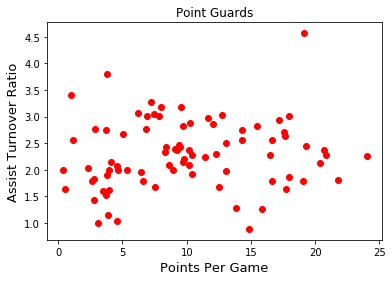

In [8]:
#Using Matplotlib to create a scatter plot with Points Per Game (ppg) on the X axis and Assist Turnover Ratio (atr) on the Y axis.
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(point_guards['ppg'], point_guards['atr'], c='red')
plt.title("Point Guards")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

<b>Clustering the Players</b><br>
There seem to be 5 general regions, or clusters, that the point guards fall into (with a few outliers of course!). We can use a technique called clustering to segment all of the point guards into groups of alike players. While regression and other supervised machine learning techniques work well when we have a clear metric we want to optimize for and lots of pre-labelled data, we need to instead use unsupervised machine learning techniques to explore the structure within a data set that doesn't have a clear value to optimize.

There are multiple ways of clustering data but here we will focus on centroid based clustering for this lesson. Centroid based clustering works well when the clusters resemble circles with centers (or centroids). The centroid represent the geometric mean of all of the data points in that cluster.

K-Means Clustering is a popular centroid-based clustering algorithm that we will use. The K in K-Means refers to the number of clusters we want to segment our data into. The key part with K-Means (and most unsupervised machine learning techniques) is that we have to specify what k is. There are advantages and disadvantages to this, but one advantage is that we can pick the k that makes the most sense for our use case. We'll set k to 5 since we want K-Means to segment our data into 5 clusters.

In [11]:
#implementation of Algorithm
import random
num_clusters = 5

# Use numpy's random function to generate a list, length: num_clusters, of indices.
random_initial_points = np.random.choice(point_guards.index, size=num_clusters)

# Use the random indices to create the centroids.
centroids = point_guards.loc[random_initial_points]

Text(0, 0.5, 'Assist Turnover Ratio')

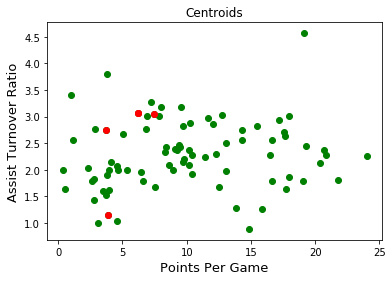

In [13]:
#Now, Let's plot the centroids, in addition to the point_guards, so we can see where the randomly chosen centroids started out.
plt.scatter(point_guards['ppg'], point_guards['atr'], c='green')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points Per Game', fontsize=13)
plt.ylabel('Assist Turnover Ratio', fontsize=13)

While the centroids data frame object worked well for the initial centroids, where the centroids were just a subset of players, as we iterate the centroids' values will be coordinates that may not match another player's coordinates. Moving forward, let's use a dictionary object instead to represent the centroids.

We will need a unique identifier, like cluster_id, to refer to each cluster's centroid and a list representation of the centroid's coordinates (or values for ppg and atr). Let's create a dictionary then with the following mapping:

    * key: `cluster_id` of that centroid's cluster
    * value: centroid's coordinates expressed as a list ( `ppg` value first, `atr` value second )

To generate the cluster_ids, let's iterate through each centroid and assign an integer from 0 to k-1. For example, the first centroid will have a cluster_id of 0, while the second one will have a cluster_id of 1. We'll write a function, centroids_to_dict, that takes in the centroids data frame object, creates a cluster_id and converts the ppg and atr values for that centroid into a list of coordinates, and adds both the cluster_id and coordinates_list into the dictionary that's returned.

In [14]:
def centroids_to_dict(centroids):
    dictionary = dict()
    # Iterating counter we use to generate a cluster_id.
    counter = 0

    # Iterate a pandas data frame row-wise using .iterrows().
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1

    return dictionary

centroids_dict = centroids_to_dict(centroids)
print("centroids_dict", centroids_dict)

centroids_dict {0: [3.7285714285714286, 2.753846153846154], 1: [6.222222222222222, 3.076923076923077], 2: [3.869565217391304, 1.1612903225806452], 3: [6.222222222222222, 3.076923076923077], 4: [7.4520547945205475, 3.044943820224719]}


In [15]:
#Calculating the Euclidean Distance
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference**2
        root_distance += squared_difference

    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

q = [5, 2]
p = [3,1]

# Sqrt(5) = ~2.24
print("calculate_distance(q, p)", calculate_distance(q, p))

calculate_distance(q, p) 2.23606797749979


Now we need a way to assign data points to clusters based on Euclidean distance. Instead of creating a new variable or data structure to house the clusters, let's keep things simple and just add a column to the point_guards data frame that contains the cluster_id of the cluster it belongs to.

Create a function that can be applied to every row in the data set (using the apply function in pandas). For each player, we want to calculate the distances to each cluster's centroid using euclidean_distance. Once we know the distances, we can determine which centroid is the closest (has the lowest distance) and return that centroid's cluster_id.

Create a new column, cluster, that contains the row-wise results of assign_to_cluste

In [16]:
def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['ppg'], row['atr']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id 
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

In [17]:
point_guards.head(10)

player pos  age bref_team_id   g  gs    mp   fg  fga    fg.  ...  \
24    D.J. Augustin  PG   26          TOT  71   9  1939  298  718  0.415  ...   
29  Leandro Barbosa  PG   31          PHO  20   0   368   56  131  0.427  ...   
30       Jose Barea  PG   29          MIN  79   1  1471  254  656  0.387  ...   
38   Jerryd Bayless  PG   25          TOT  72  19  1686  248  617  0.402  ...   
50      Steve Blake  PG   33          TOT  55  28  1498  133  353  0.377  ...   
52     Eric Bledsoe  PG   24          PHO  43  40  1416  265  556  0.477  ...   
60    Avery Bradley  PG   23          BOS  60  58  1855  361  825  0.438  ...   
64     Aaron Brooks  PG   29          TOT  72  12  1557  233  581  0.401  ...   
71       Trey Burke  PG   21          UTA  70  68  2262  341  897  0.380  ...   
76    Dwight Buycks  PG   24          TOR  14   0   146   15   48  0.313  ...   

    stl  blk  tov   pf  pts     season  season_end        ppg       atr  \
24   53    3  125  147  930  2013-2014        2013  13.098592  2.504000   
29    7    4   19   30  150  2013-2014        2013   7.500000  1.684211   
30   26    0  125  129  660  2013-2014        2013   8.354430  2.424000   
38   60    9   82  161  666  2013-2014        2013   9.250000  2.365854   
50   54    8  102   85  378  2013-2014        2013   6.872727  3.009804   
52   69   14  143   99  763  2013-2014        2013  17.744186  1.643357   
60   63   11   96  145  891  2013-2014        2013  14.850000  0.885417   
64   52   13  117  146  645  2013-2014        2013   8.958333  1.991453   
71   42    6  131  145  895  2013-2014        2013  12.785714  3.022901   
76    8    0   10   11   43  2013-2014        2013   3.071429  1.000000   

    cluster  
24        4  
29        4  
30        4  
38        4  
50        4  
52        4  
60        4  
64        4  
71        4  
76        2  

[10 rows x 34 columns]

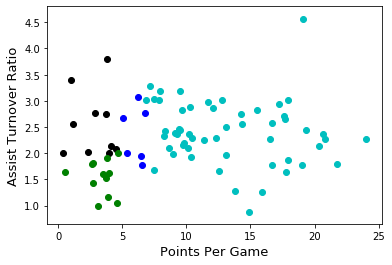

In [18]:
# Visualizing clusters
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
        plt.xlabel('Points Per Game', fontsize=13)
        plt.ylabel('Assist Turnover Ratio', fontsize=13)
visualize_clusters(point_guards, 5)

Finish the function, recalculate_centroids, that takes in the point_guards data frame object, uses each cluster_id(from 0 to num_clusters - 1) to pull out all of the players in each cluster, calculates the new geometric mean, and adds the cluster_id and the new geometric mean to new_centroids_dict, the final dictionary to be returned.

In [19]:
#Recalculating the Centroids
def recalculate_centroids(df):
    new_centroids_dict = dict()
    
    for cluster_id in range(0, num_clusters):
        values_in_cluster = df[df['cluster'] == cluster_id]
        # Calculate new centroid using mean of values in the cluster.
        new_centroid = [np.average(values_in_cluster['ppg']), np.average(values_in_cluster['atr'])]
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict

centroids_dict = recalculate_centroids(point_guards)
print("centroids_dict:", centroids_dict)

centroids_dict: {0: [2.7836900079679965, 2.5528705933377784], 1: [6.061701139649959, 2.375645421803664], 2: [3.319845521199014, 1.5478393029800825], 3: [nan, nan], 4: [13.244084229788482, 2.404761189721518]}


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


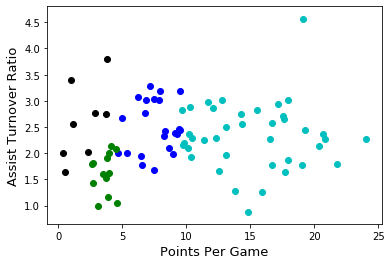

In [20]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

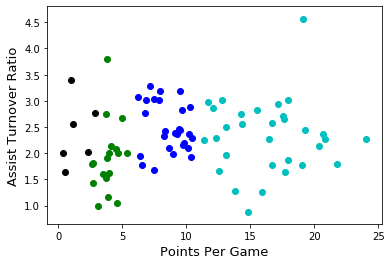

In [21]:
#Now we need to recalculate the centroids, and shift the clusters again.
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

## Challenges of K-Means

As you repeat Steps 1 and 2 and run visualize_clusters, you'll notice that a few of the points are changing clusters between every iteration (especially in areas where 2 clusters almost overlap), but otherwise, the clusters visually look like they don't move a lot after every iteration. This means 2 things:

- K-Means doesn't cause massive changes in the makeup of clusters between iterations, meaning that it will always converge and become stable
- Because K-Means is conservative between iterations, where we pick the initial centroids and how we assign the players to clusters initially matters a lot

To counteract these problems, the sklearn implementation of K-Means does some intelligent things like re-running the entire clustering process lots of times with random initial centroids so the final results are a little less biased on one passthrough's initial centroids.

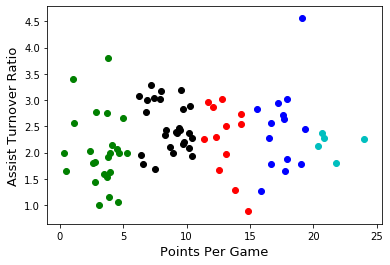

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg', 'atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)

<b>Conclusion</b><br>
In this problem, we explored how to segment NBA players into groups with similar traits. Our exploration helped us get a sense of the 5 types of point guards as based on each player's Assist Turnover Ratio and Points Per Game. In future, we will explore how to cluster using many more features, as well as alternative ways of clustering data without using centroids.

We also got to experience the beautify of sklearn and the simplicity of using sophisticated models to get what we need accomplished quickly. In just a few lines, we ran and visualized the results of a robust K-means clustering implementation. When using K-means in the real world, by using the sklearn implementation.